 Basic Statistical Analysis of Sensor Data.

In [31]:
# import library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

Load dataset

In [ ]:
# Load dataset
# Download dataset ('/kaggle/input/tempsense-temperature-and-sensor-data/Data.csv')
df = pd.read_csv("Data.csv")

In [ ]:
# Describle dataset
df.describe()

,Temperature,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5
count,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000
mean,24.989396,0.502612,0.496721,0.497600,0.495230,0.496095
std,2.898912,0.290374,0.293774,0.287507,0.287608,0.289214
min,18.982907,0.000243,0.000388,0.000091,0.000244,0.000254
25%,22.542058,0.252100,0.240042,0.249052,0.251254,0.241400
50%,24.972157,0.504355,0.495343,0.506430,0.491202,0.494519
75%,27.396090,0.758330,0.750479,0.750505,0.741194,0.748835
max,31.739198,0.999787,0.999965,0.999586,0.999667,0.999862


Data visualization

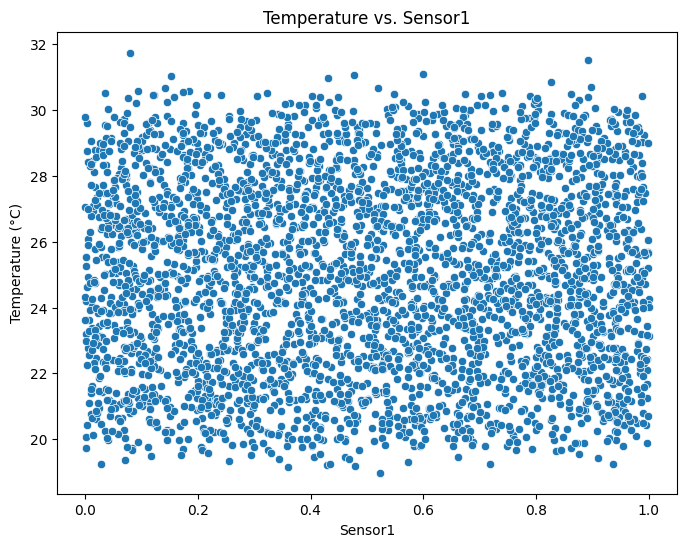

In [ ]:
# visualisation with Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sensor1', y='Temperature', data=df)
plt.xlabel('Sensor1')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs. Sensor1')
plt.show()

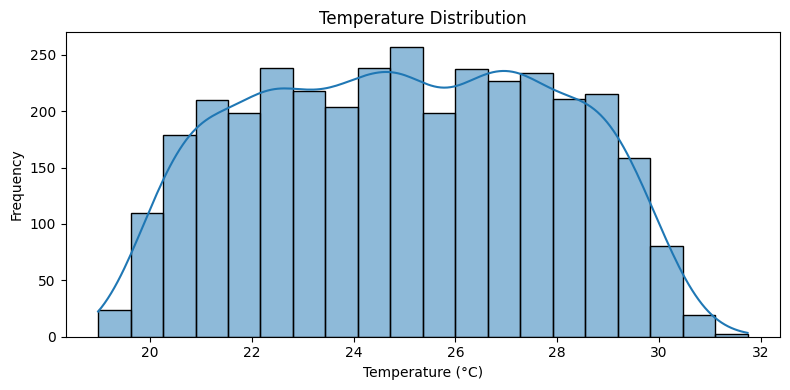

In [ ]:
# visualisation with histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['Temperature'], bins=20, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

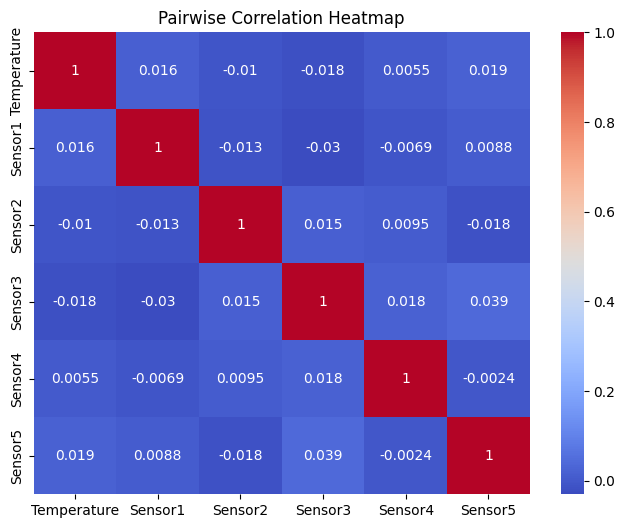

In [39]:
# visualisation with headmap
plt.figure(figsize=(8, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Pairwise Correlation Heatmap')
plt.savefig("Pairwise_Correlation_Heatmap.png")
plt.show()

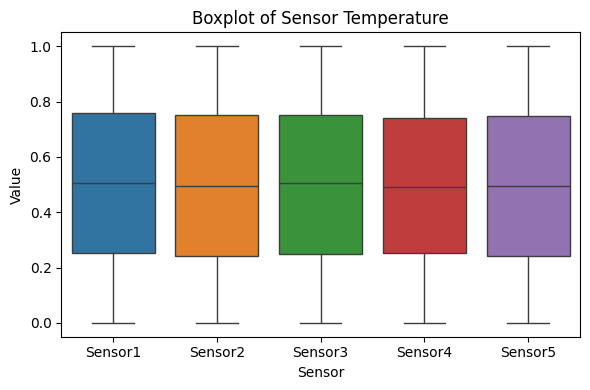

In [ ]:
# visualisation with Boxplot for Outliers
plt.figure(figsize=(6, 4))
sns.boxplot(data=df.drop('Temperature', axis=1))
plt.xlabel('Sensor')
plt.ylabel('Value')
plt.title('Boxplot of Sensor Temperature')
plt.tight_layout()
plt.savefig("plot_boxplot.png")
plt.show()

Training with Linear Regression

In [ ]:
# Train a Random Forest Regressor
X = df.drop('Temperature', axis=1)
y = df['Temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predictions
y_pred = model.predict(X_test)

In [27]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nLinear Regression Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Linear Regression Performance:
Mean Squared Error: 8.08
R² Score: -0.0025


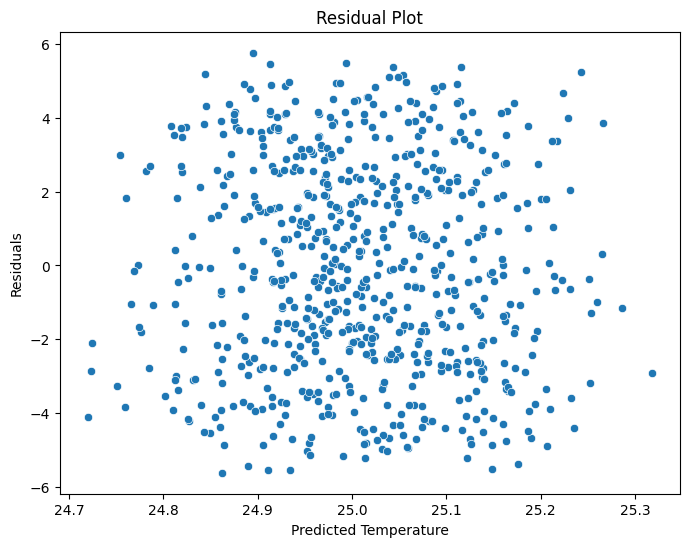

In [40]:
# Visualize 
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted Temperature')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


Training with Random Forest

In [32]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
# Predict
y_rf_pred = rf_model.predict(X_test)

In [35]:
# Evaluate
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

print(f"\nRandom Forest Regressor:")
print(f"MSE: {mse_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")


Random Forest Regressor:
MSE: 8.64
R² Score: -0.0719


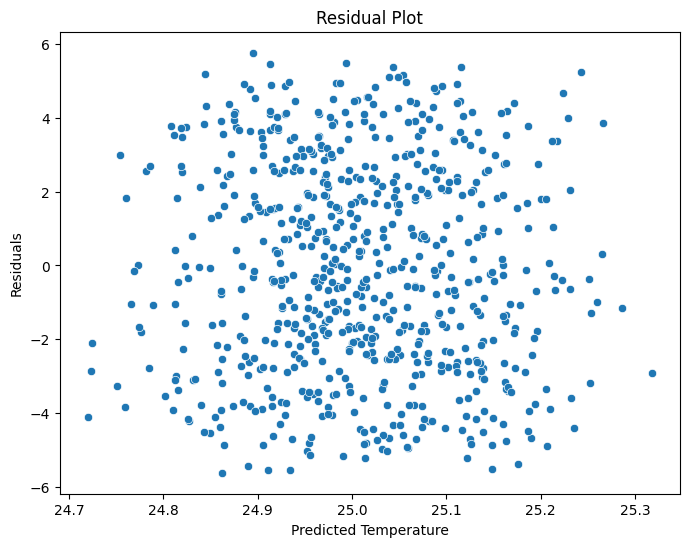

In [41]:
# Visualize 
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted Temperature')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()